# Atelier N°2: Regression linéaire simple & regression linéaire multiple

# Réalisé par TRAORE Koudadim Olivier

# 1. Regression linéaire simple

# 1.1 Importation des packages

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1.2 Chargement des données

In [13]:
df = pd.read_csv('C:/Users/asus/Desktop/IFA 2/Semestre 2/Analyse de données/Diamonds Prices2022.csv')
#Construction d'une nouvelle de données comportant deux variables: 
#Variable à expliquer: price (prix du diamant)
# Variable explicative: weigth (poids du diamant mesure en carat)

Df=pd.DataFrame({'weigth':df['carat'],
                 'price': df['price']
    
})
Df


,weigth,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53938,0.86,2757
53939,0.75,2757
53940,0.71,2756
53941,0.71,2756


# 1.3 Nuage de points

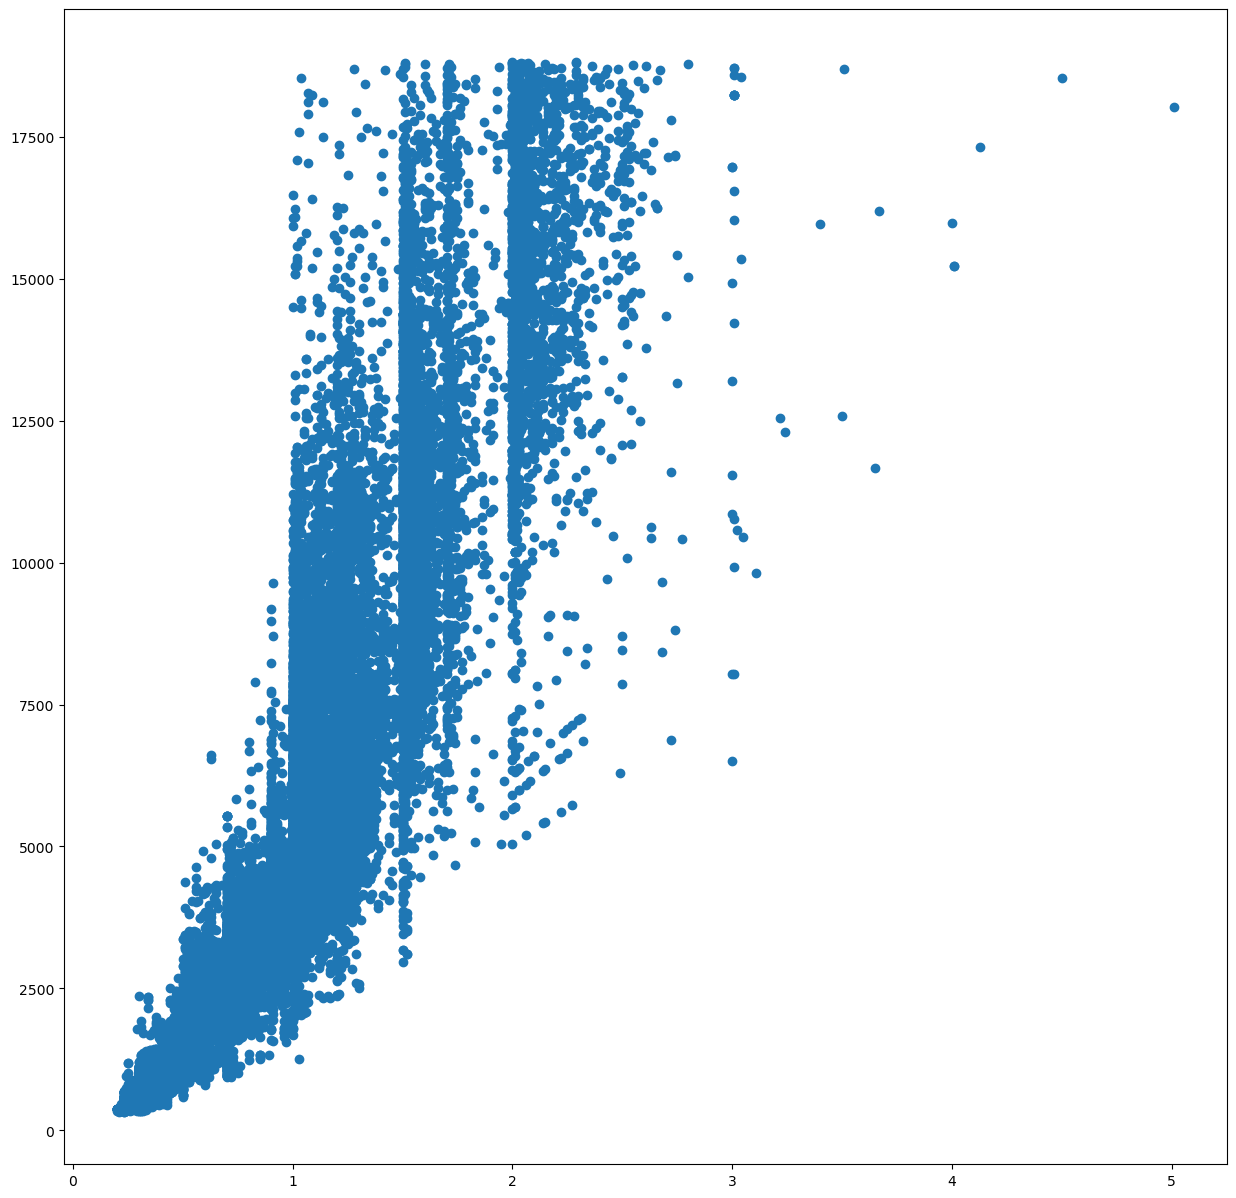

In [24]:
fig = plt.figure(figsize =(15,15))
plt.plot(Df['weigth'],Df['price'],'o')

# 1.4 Ajustement du nuage de points par la droite de regression

<AxesSubplot:xlabel='weigth', ylabel='price'>

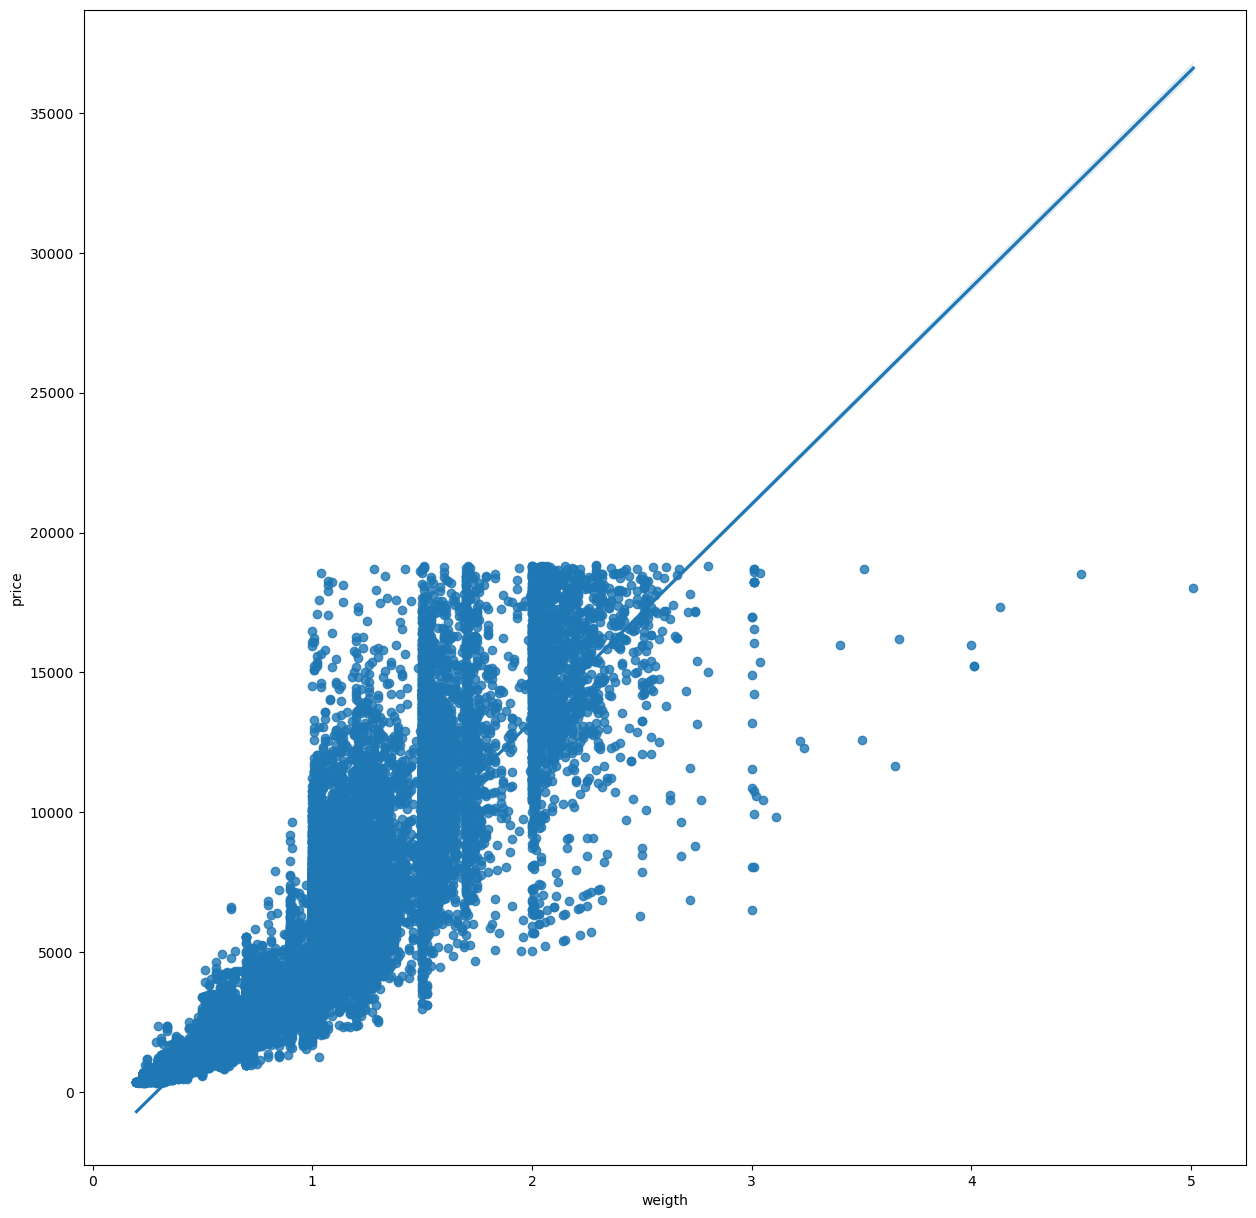

In [26]:
fig = plt.figure(figsize =(15,15))
sns.regplot('weigth', 'price', data=Df)

# 1.5 Création du modèle

In [27]:
#Syntaxe : statsmodels.formula.api.ols(formula, data,...)
#Créer un modèle à partir d'une formule et un dataframe.
#r-squared : mesurer la corrélation entre deux variables.

model = smf.ols(formula='price ~ weigth', data=Df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:53:34   Log-Likelihood:            -4.7276e+05
No. Observations:               53943   AIC:                         9.455e+05
Df Residuals:                   53941   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3950     13.055   -172.840      0.0

# 1.6 Prédiction

In [29]:
ypred = model.predict(Df['weigth'])
print(ypred)

0        -472.414731
1        -627.543454
2        -472.414731
3          -7.028561
4         148.100162
            ...     
53938    4414.140050
53939    3560.932072
53940    3250.674626
53941    3250.674626
53942    3173.110264
Length: 53943, dtype: float64


# 2. Rgression linéaire multiple

# 2.1 Importation des données

In [37]:
# Read a csv file into Pandas Dataframe
df = pd.read_csv('C:/Users/asus/Desktop/IFA 2/Semestre 2/Analyse de données/insurance_data.csv')
df.head()


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,25.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,21.0,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,22.0,male,34.1,100,No,0,No,northwest,1137.01


# 2.2 Création du modèle

## Il sera question d'expliquer la prime, claim, exigée par une assurance en fonction des variables explicatives que sont: age, bmi et bloodpressure 

In [36]:
import statsmodels.api as sm
y=df['claim']
x=df[['age','bmi','bloodpressure']]
x=sm.add_constant(x)
# Create a fitted model
lm = sm.OLS(y,x).fit()

# Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     188.6
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          6.05e-102
Time:                        17:33:30   Log-Likelihood:                -14263.
No. Observations:                1340   AIC:                         2.853e+04
Df Residuals:                    1336   BIC:                         2.855e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.608e+04   2780.541    -16.571

# 2.3 Prédiction

In [39]:
ypred = lm.predict(x)
print(ypred)

0        9707.686705
1        9028.624918
2        7106.696057
3        6062.881266
4       17066.194717
            ...     
1335    11168.012323
1336    29433.716437
1337    12369.683501
1338    19622.098783
1339    20990.825103
Length: 1340, dtype: float64
